# Linear regression from scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
# sklearn imported only to calculate errors

df = pd.read_csv("housingdata.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#mapping
binary_map = {"yes": 1, "no": 0}
df["mainroad"] = df["mainroad"].map(binary_map)
df["guestroom"] = df["guestroom"].map(binary_map)
df["basement"] = df["basement"].map(binary_map)
df["hotwaterheating"] = df["hotwaterheating"].map(binary_map)
df["airconditioning"] = df["airconditioning"].map(binary_map)
df["prefarea"] = df["prefarea"].map(binary_map)

furnishing_map = {"unfurnished": 0, "semi-furnished": 1, "furnished": 2}
df["furnishingstatus"] = df["furnishingstatus"].map(furnishing_map)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [3]:
#features and target
X = df.drop(columns=["price"]).values
y = df["price"].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [14]:
def train_test_split_m(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)  
    
    indices = np.arange(len(X))  
    np.random.shuffle(indices)   
    
    split_idx = int(len(X) * (1 - test_size))  
    
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_m(X, y, test_size=0.2, random_state=42)


In [15]:
#linear regression algorithm
class LinearRegressionRegularized:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_l1=0.0, lambda_l2=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.w = None
        self.b = None

    def compute_loss(self, y, y_pred):
        n = len(y)
        mse_loss = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
        l1_loss = self.lambda_l1 * np.sum(np.abs(self.w))
        l2_loss = (self.lambda_l2 / 2) * np.sum(self.w ** 2)
        return mse_loss + l1_loss + l2_loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        losses = []

        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + self.lambda_l1 * np.sign(self.w) + self.lambda_l2 * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
        
        return losses

    def predict(self, X):
        return np.dot(X, self.w) + self.b



In [16]:
#non-regularized 
model_no_reg = LinearRegressionRegularized(learning_rate=0.01, epochs=1000)
losses_no_reg = model_no_reg.fit(X_train, y_train)
y_pred_no_reg = model_no_reg.predict(X_test)
mae_no_reg = mean_absolute_error(y_test, y_pred_no_reg)
r2_no_reg = r2_score(y_test, y_pred_no_reg)

#regularized 
model_reg = LinearRegressionRegularized(learning_rate=0.01, epochs=1000, lambda_l1=0.1, lambda_l2=0.1)
losses_reg = model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
mae_reg = mean_absolute_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

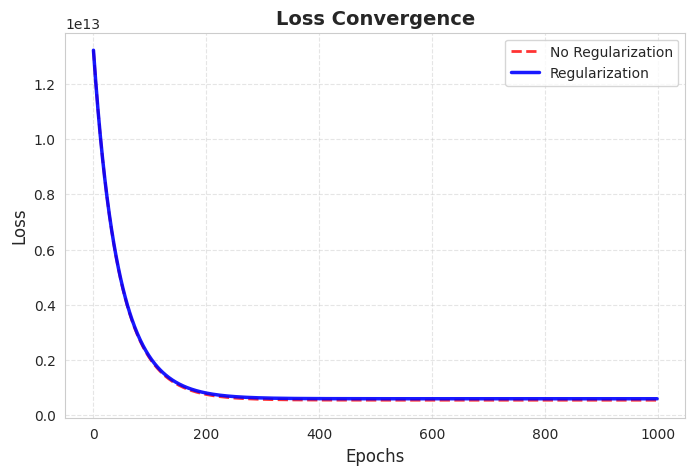

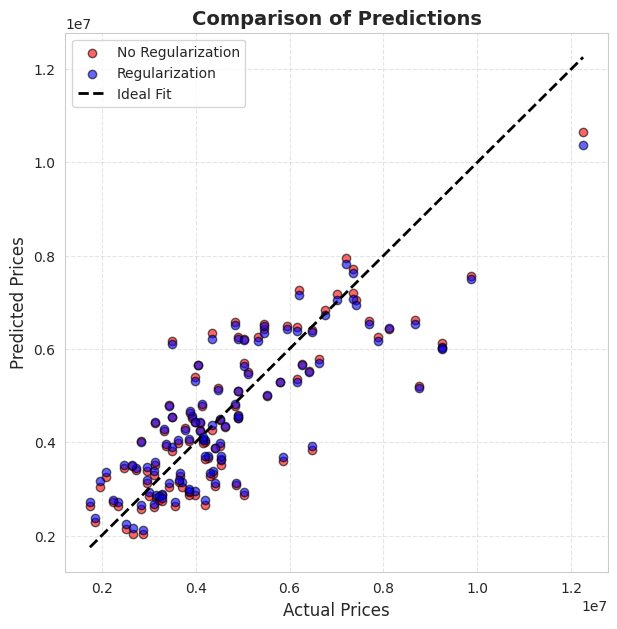

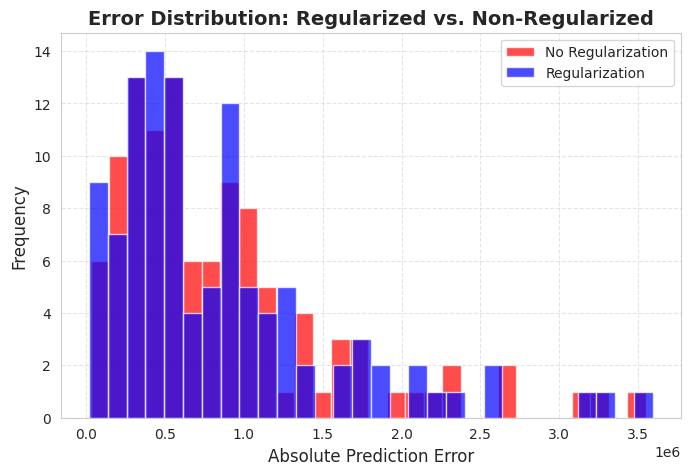

In [17]:
import seaborn as sns

sns.set_style("whitegrid")

errors_no_reg = np.abs(y_test - y_pred_no_reg)
errors_reg = np.abs(y_test - y_pred_reg)

plt.figure(figsize=(8, 5))
plt.plot(losses_no_reg, label="No Regularization", linestyle="--", linewidth=2, color="red", alpha=0.8)
plt.plot(losses_reg, label="Regularization", linestyle="-", linewidth=2.5, color="blue", alpha=0.9)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Loss Convergence", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_no_reg, label="No Regularization", alpha=0.6, color="red", edgecolor="black")
plt.scatter(y_test, y_pred_reg, label="Regularization", alpha=0.6, color="blue", edgecolor="black")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black", linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Comparison of Predictions", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(errors_no_reg, bins=30, alpha=0.7, color="red", label="No Regularization")
plt.hist(errors_reg, bins=30, alpha=0.7, color="blue", label="Regularization")
plt.xlabel("Absolute Prediction Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution: Regularized vs. Non-Regularized", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [18]:
print("Non-Regularized Model:")
print(f"Mean Absolute Error: {mae_no_reg:.2f}")
print(f"R² Score: {r2_no_reg:.4f}\n")

print("Regularized Model:")
print(f"Mean Absolute Error: {mae_reg:.2f}")
print(f"R² Score: {r2_reg:.4f}")


Non-Regularized Model:
Mean Absolute Error: 860703.08
R² Score: 0.6458

Regularized Model:
Mean Absolute Error: 846833.32
R² Score: 0.6493
